<H2>Part 1: dimensionality reduction

<H3>data importing

In [1]:
import pandas as pd
from sklearn.datasets import load_breast_cancer
cancer_data = load_breast_cancer()
df = pd.DataFrame(cancer_data.data, columns=cancer_data.feature_names)
df['target'] = cancer_data.target
df['diagnosis'] = df['target'].map({0: 'M', 1: 'B'})
df = df.drop(columns=['diagnosis'])
data= df.drop(columns=['target'])
target=df['target']
df.head()



,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<H3>PCA (Principal Component Analysis)

In [2]:
import numpy as np
class PCA:
    def __init__(self, n_components=2):
        self.n_components = n_components
        self.components = None
        self.mean = None
        self.std = None
        self.eigenvalues = None
        self.explained_variance_ratio = None
    def fit(self, X):
        # 1. Standardize (Mean = 0, Std = 1)
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        X_scaled = (X - self.mean) / self.std

        # 2. Covariance Matrix
        # rowvar=False means columns are variables
        cov_matrix = np.cov(X_scaled, rowvar=False)

        # 3. Eigenvalue Decomposition
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # 4. Sort Eigenvectors by Eigenvalues (Descending)
        # Transpose eigenvectors so they are row-wise for easier indexing
        eigenvectors = eigenvectors.T
        idxs = np.argsort(eigenvalues)[::-1]
        
        self.eigenvalues = eigenvalues[idxs]
        self.components = eigenvectors[idxs][0:self.n_components]

        # 5. Explained Variance Ratio
        total_variance = np.sum(self.eigenvalues)
        self.explained_variance_ratio = self.eigenvalues[:self.n_components] / total_variance
        
        return self

    def transform(self, X):
      
        X_scaled = (X - self.mean) / self.std
      
        return np.dot(X_scaled, self.components.T)
    def inverse_transform(self, X_pca):
        # Project back to original feature space
        X_reconstructed_scaled = np.dot(X_pca, self.components)
        # Un-scale and un-center
        return (X_reconstructed_scaled * self.std) + self.mean

    def get_reconstruction_error(self, X):
        X_pca = self.transform(X)
        X_reconstructed = self.inverse_transform(X_pca)
        # Mean Squared Error between original and reconstructed
        return np.mean(np.square(X - X_reconstructed))

In [3]:

for n_component in [2, 5, 10, 15, 20]:
    pca = PCA(n_components=n_component)
    pca.fit(data.values)

    data_reduced = pca.transform(data.values)
    reconstruction_error = pca.get_reconstruction_error(data.values)
    print(f"\nNumber of Components: {n_component}")
    print(f"Explained Variance Ratio: {pca.explained_variance_ratio}")
    print(f"Total Variance Captured: {np.sum(pca.explained_variance_ratio):.2%}")
    print(f"Reconstruction Error (MSE): {reconstruction_error:.4f}")


Number of Components: 2
Explained Variance Ratio: [0.44272026 0.18971182]
Total Variance Captured: 63.24%
Reconstruction Error (MSE): 809.7928

Number of Components: 5
Explained Variance Ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]
Total Variance Captured: 84.73%
Reconstruction Error (MSE): 729.8173

Number of Components: 10
Explained Variance Ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978]
Total Variance Captured: 95.16%
Reconstruction Error (MSE): 515.5582

Number of Components: 15
Explained Variance Ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.01168978 0.00979719 0.00870538
 0.00804525 0.00523366 0.00313783]
Total Variance Captured: 98.65%
Reconstruction Error (MSE): 249.0515

Number of Components: 20
Explained Variance Ratio: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734 0.01588724 0.01389649 0.

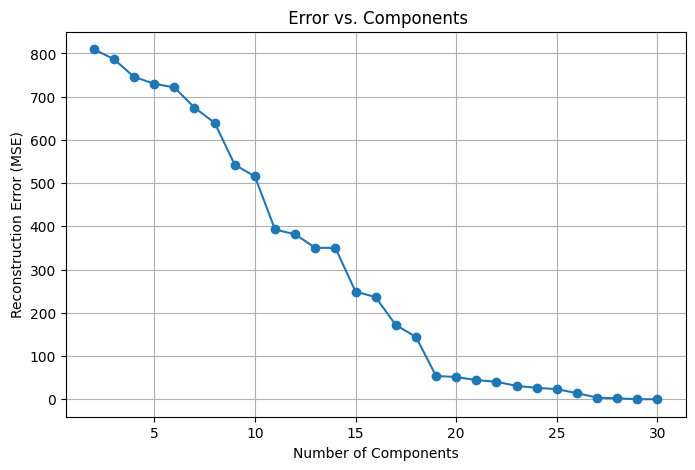

In [4]:
import matplotlib.pyplot as plt
components_list = range(2, data.shape[1] + 1)
errors = []

for n in components_list:
    pca_test = PCA(n_components=n)
    pca_test.fit(data.values)
    errors.append(pca_test.get_reconstruction_error(data.values))

plt.figure(figsize=(8, 5))
plt.plot(components_list, errors, 'o-')
plt.xlabel('Number of Components')
plt.ylabel('Reconstruction Error (MSE)')
plt.title(' Error vs. Components')
plt.grid(True)
plt.show()

<H3>outlier detection

In [5]:

pca = PCA(n_components=2) 

pca.fit(data.values) 

#  compress and decompress
data_pca = pca.transform(data.values)
data_reconstructed = pca.inverse_transform(data_pca)
# 'Difference' (Error)
# We compare the original data to the reconstructed data
reconstruction_errors = np.sum(np.square(data.values - data_reconstructed), axis=1)

# 5. Find the 'Weirdest' 5% (Anomalies)
threshold = np.percentile(reconstruction_errors, 95)  # sort all the values and find the value that cuts off the top 5%
outliers = reconstruction_errors > threshold

print(f"Detected {np.sum(outliers)} potential outliers.")

Detected 29 potential outliers.


<H4>graphing outlier

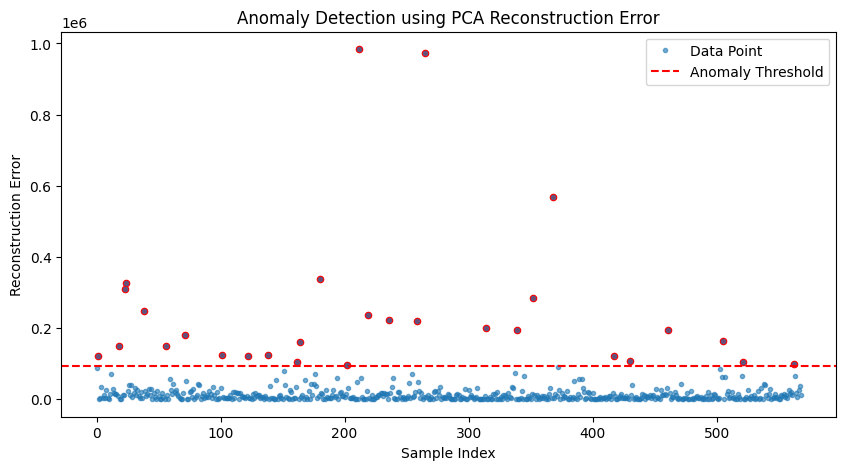

In [6]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(reconstruction_errors, 'o', markersize=3, alpha=0.6, label='Data Point')
plt.axhline(y=threshold, color='r', linestyle='--', label='Anomaly Threshold')

# Highlight detected outliers in red
outlier_indices = np.where(outliers)[0]
plt.scatter(outlier_indices, reconstruction_errors[outlier_indices], color='red', s=20)

plt.xlabel('Sample Index')
plt.ylabel('Reconstruction Error')
plt.title('Anomaly Detection using PCA Reconstruction Error')
plt.legend()
plt.show()

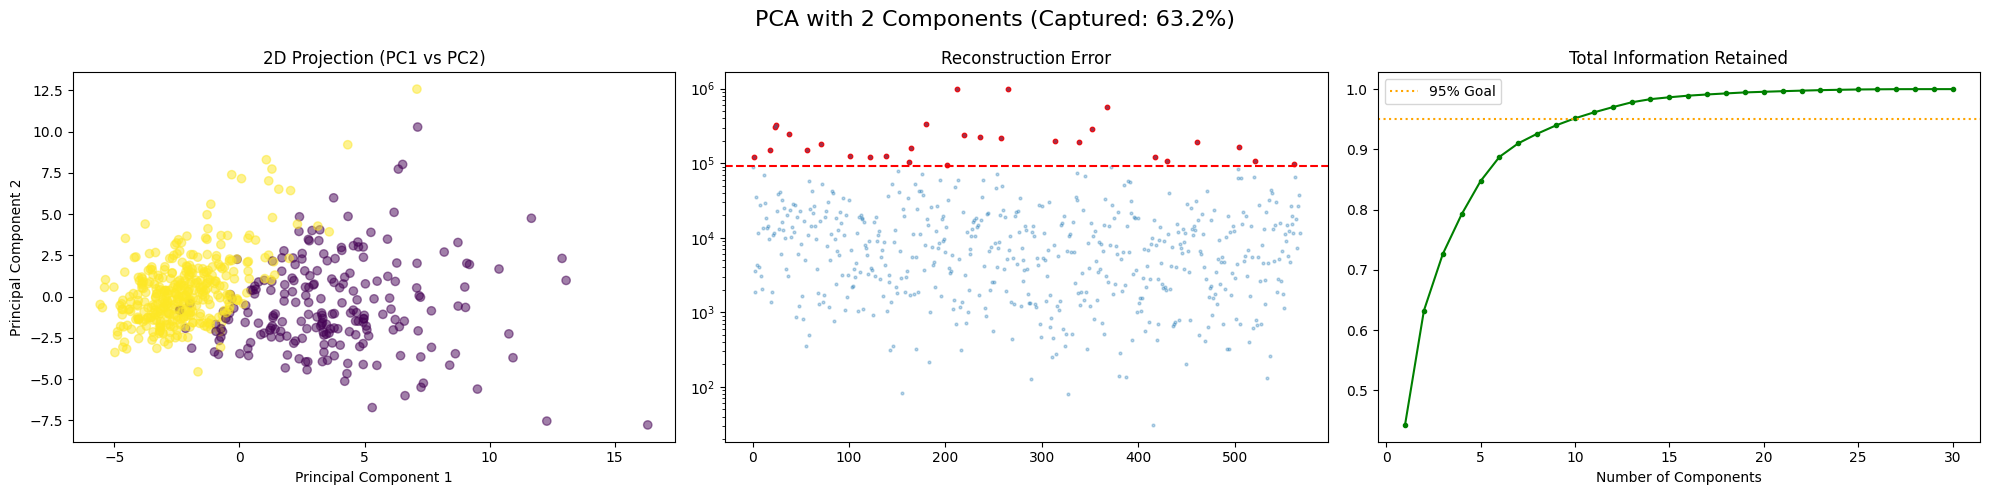

Done for n=2. Error dropped to: 24293.7825


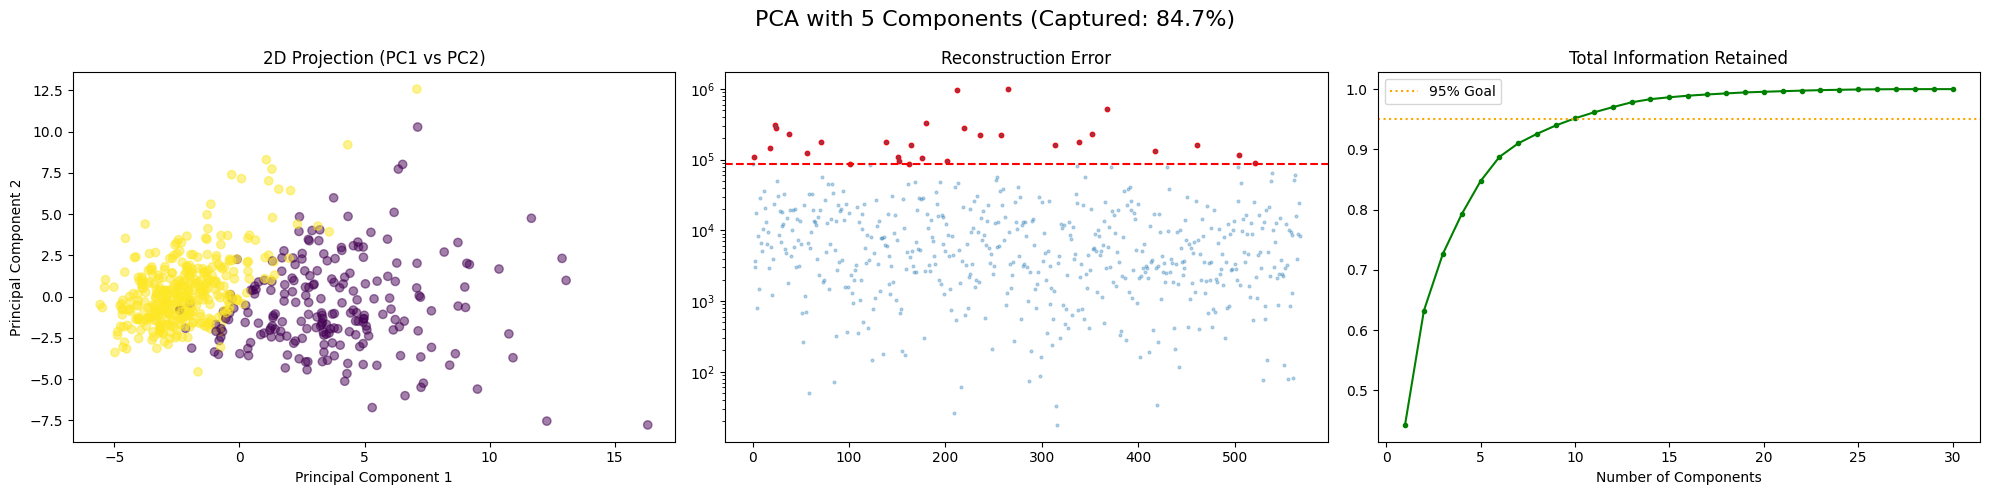

Done for n=5. Error dropped to: 21894.5202


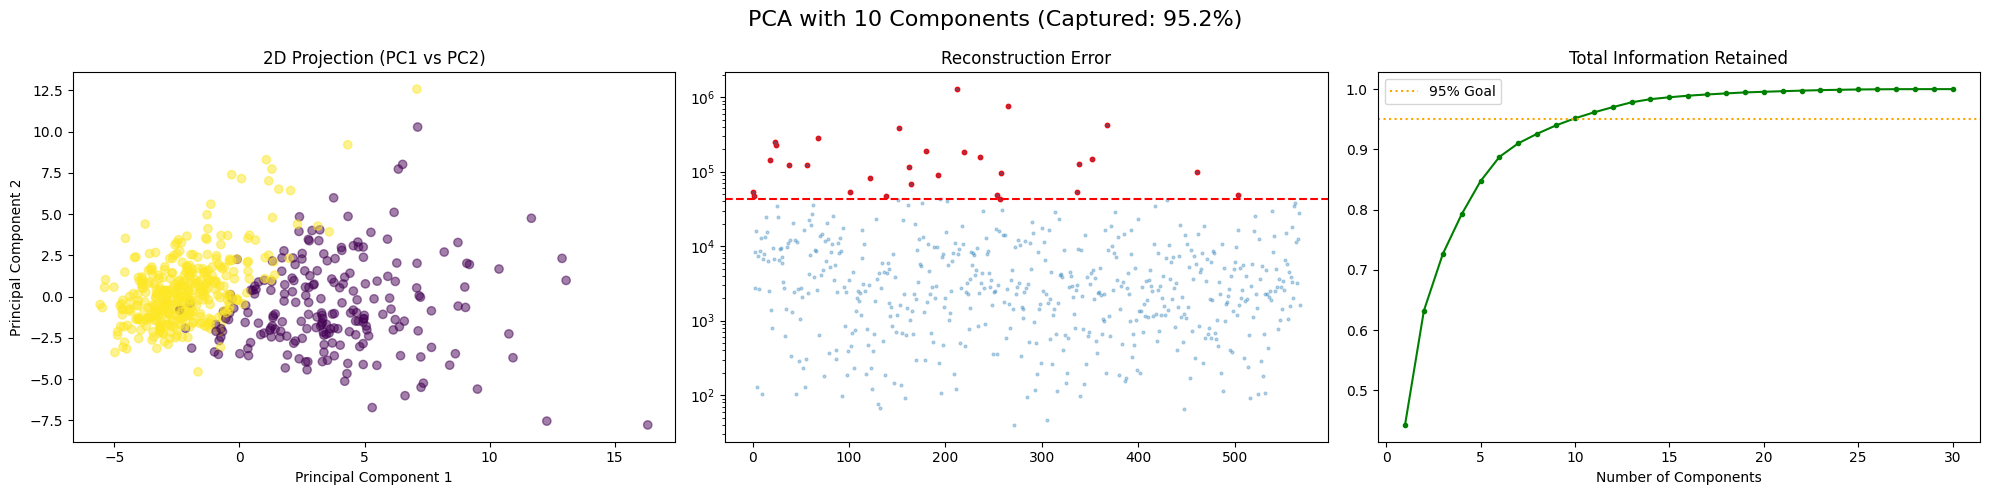

Done for n=10. Error dropped to: 15466.7446


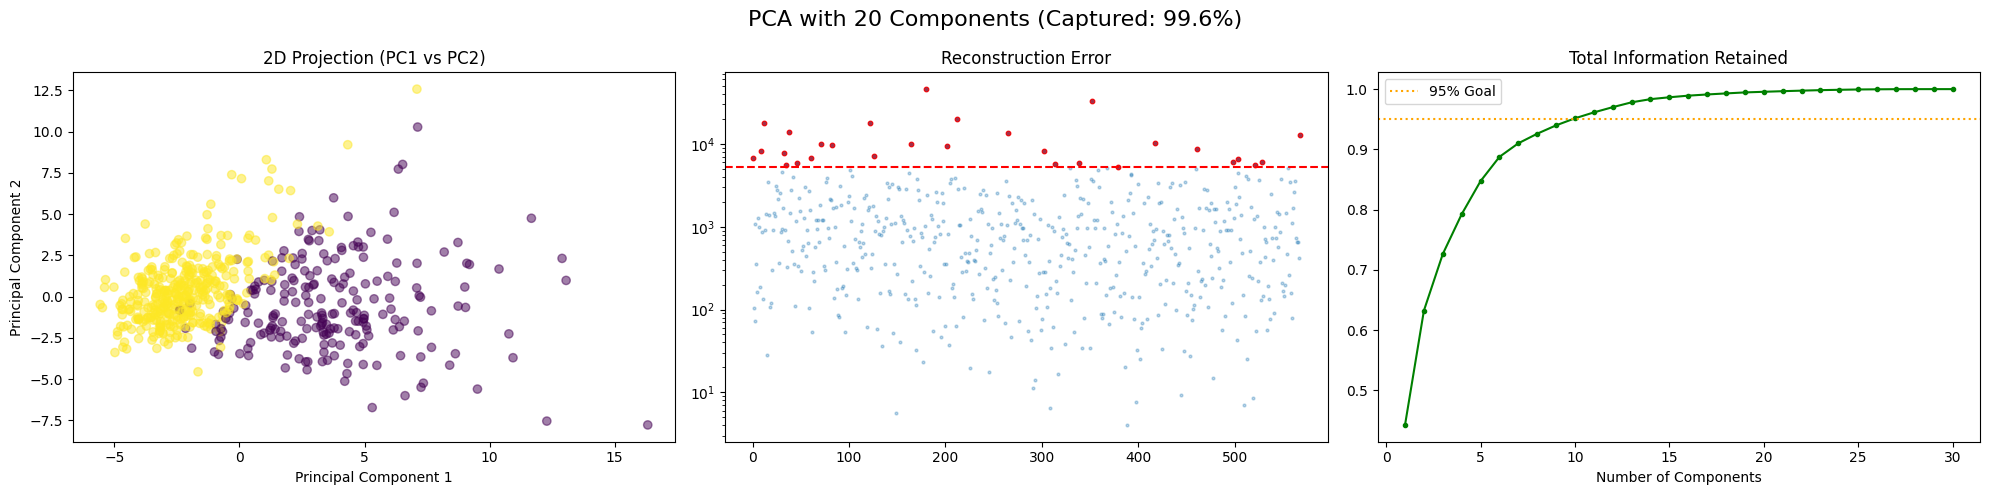

Done for n=20. Error dropped to: 1542.1077


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# We iterate through different levels of compression
for n_component in [2, 5, 10, 20]:
    # 1. Fit the PCA with the specific number of components
    pca = PCA(n_components=n_component)
    pca.fit(data.values)
    
    # 2. Project and Reconstruct
    data_pca = pca.transform(data.values)
    data_reconstructed = pca.inverse_transform(data_pca)

    # 3. Calculate Error (Distance between Original and Reconstruction)
    reconstruction_errors = np.sum(np.square(data.values - data_reconstructed), axis=1)
    threshold = np.percentile(reconstruction_errors, 95)
    outliers = reconstruction_errors > threshold

    # --- VISUALIZATION ---
    fig, axes = plt.subplots(1, 3, figsize=(20, 5))
    fig.suptitle(f'PCA with {n_component} Components (Captured: {np.sum(pca.explained_variance_ratio):.1%})', fontsize=16)

    # Subplot 1: The 2D Projection
    # We always plot the first two axes to see how they separate the classes
    scatter = axes[0].scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='viridis', alpha=0.5)
    axes[0].set_title('2D Projection (PC1 vs PC2)')
    axes[0].set_xlabel('Principal Component 1')
    axes[0].set_ylabel('Principal Component 2')

    # Subplot 2: Reconstruction Error (Anomaly Detection)
    axes[1].plot(reconstruction_errors, 'o', markersize=2, alpha=0.3)
    axes[1].axhline(y=threshold, color='r', linestyle='--', label='95% Threshold')
    outlier_idx = np.where(outliers)[0]
    axes[1].scatter(outlier_idx, reconstruction_errors[outlier_idx], color='red', s=10)
    axes[1].set_title('Reconstruction Error')
    axes[1].set_yscale('log') # Log scale helps see small errors at high N

    # Subplot 3: Cumulative Variance (The "Information" Chart)
    cum_var = np.cumsum(pca.eigenvalues) / np.sum(pca.eigenvalues)
    axes[2].plot(range(1, len(cum_var)+1), cum_var, 'g-o', markersize=3)
    axes[2].axhline(y=0.95, color='orange', linestyle=':', label='95% Goal')
    axes[2].set_title('Total Information Retained')
    axes[2].set_xlabel('Number of Components')
    axes[2].legend()

    plt.tight_layout()
    plt.show()

    print(f"Done for n={n_component}. Error dropped to: {np.mean(reconstruction_errors):.4f}")

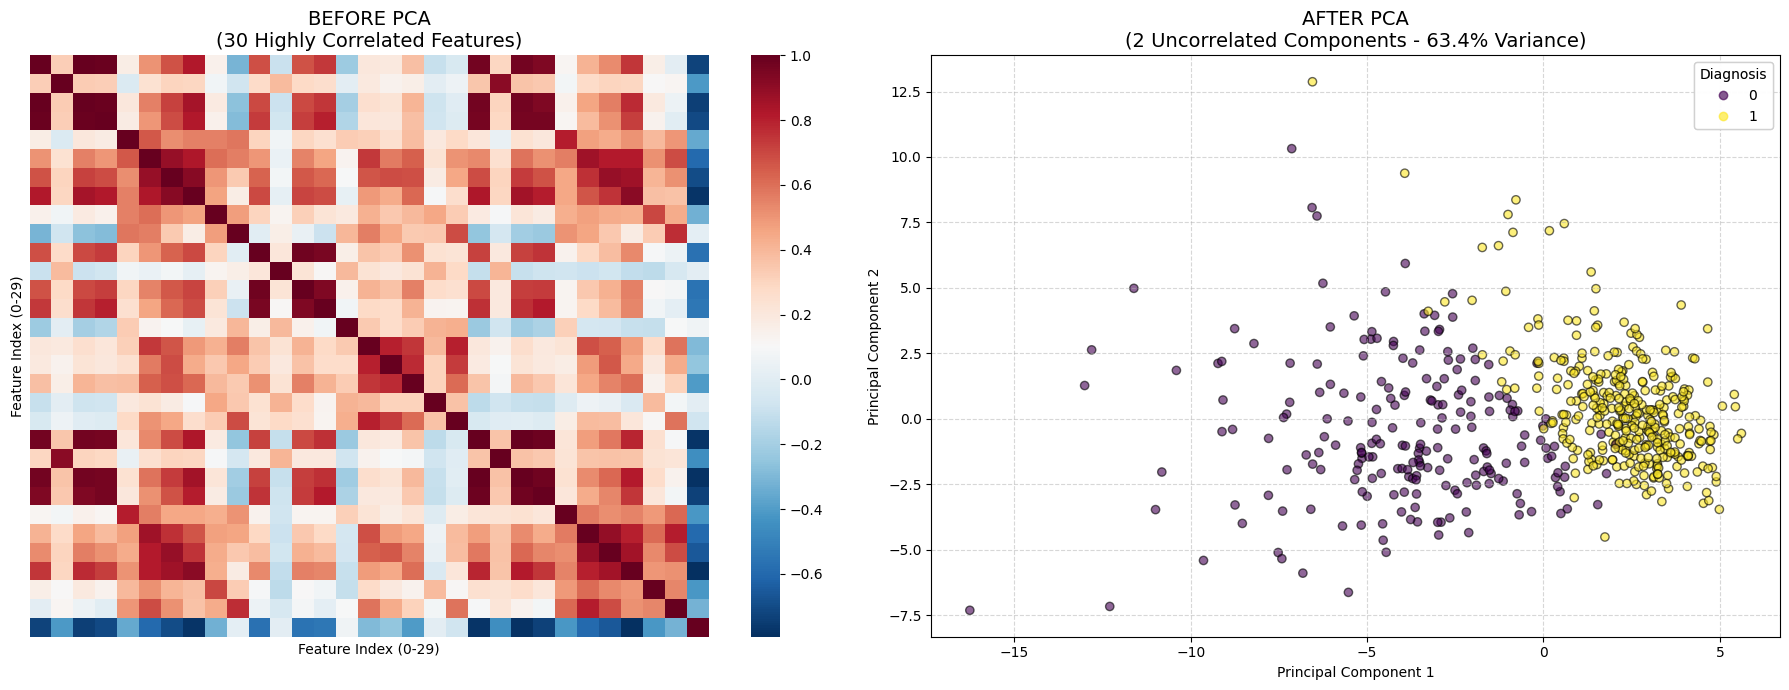

In [8]:



pca = PCA(n_components=2)
pca.fit(df.values)
data_pca = pca.transform(df.values)

# 3. VISUALIZATION
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))


correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap='RdBu_r', ax=ax1, cbar=True, xticklabels=False, yticklabels=False)
ax1.set_title("BEFORE PCA\n(30 Highly Correlated Features)", fontsize=14)
ax1.set_xlabel("Feature Index (0-29)")
ax1.set_ylabel("Feature Index (0-29)")


scatter = ax2.scatter(data_pca[:, 0], data_pca[:, 1], c=target, cmap='viridis', alpha=0.6, edgecolors='k')
ax2.set_title(f"AFTER PCA\n(2 Uncorrelated Components - {np.sum(pca.explained_variance_ratio):.1%} Variance)", fontsize=14)
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")

legend1 = ax2.legend(*scatter.legend_elements(), title="Diagnosis")
ax2.add_artist(legend1)
ax2.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

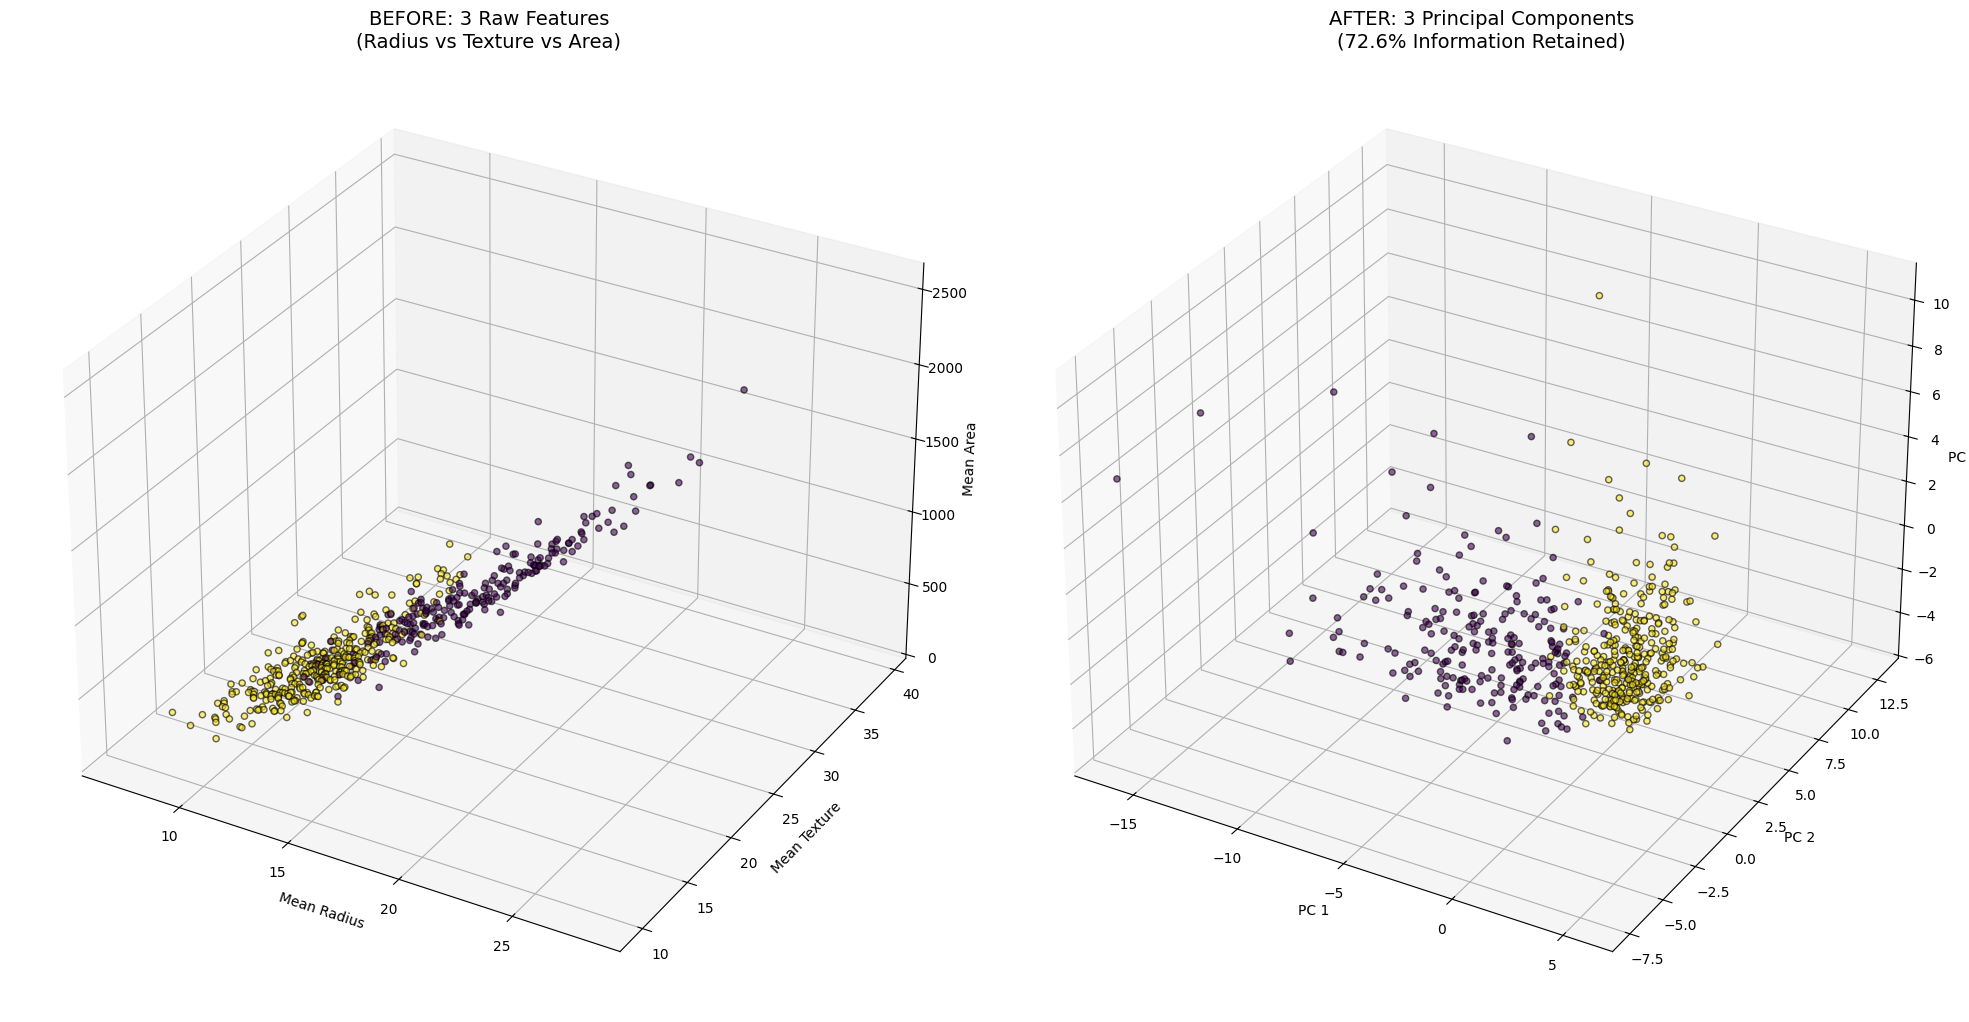

In [9]:

from mpl_toolkits.mplot3d import Axes3D




pca = PCA(n_components=3).fit(df.values)
data_pca_3d = pca.transform(df.values)


fig = plt.figure(figsize=(20, 10))


ax1 = fig.add_subplot(1, 2, 1, projection='3d')
ax1.scatter(df.iloc[:, 0], df.iloc[:, 1], df.iloc[:, 3], c=target, cmap='viridis', alpha=0.6, edgecolors='k')
ax1.set_title("BEFORE: 3 Raw Features\n(Radius vs Texture vs Area)", fontsize=14)
ax1.set_xlabel('Mean Radius')
ax1.set_ylabel('Mean Texture')
ax1.set_zlabel('Mean Area')


ax2 = fig.add_subplot(1, 2, 2, projection='3d')
scatter = ax2.scatter(data_pca_3d[:, 0], data_pca_3d[:, 1], data_pca_3d[:, 2], c=target, cmap='viridis', alpha=0.6, edgecolors='k')
ax2.set_title(f"AFTER: 3 Principal Components\n({np.sum(pca.explained_variance_ratio):.1%} Information Retained)", fontsize=14)
ax2.set_xlabel('PC 1')
ax2.set_ylabel('PC 2')
ax2.set_zlabel('PC 3')

plt.tight_layout()
plt.show()

<H3>3. K-Means Clustering

In [10]:
import numpy as np

class Kmeans:
    def __init__(self, k=3, init_centroids='random', max_iters=300, tol=1e-4):
        self.k = k
        self.init_centroid_method = init_centroids 
        self.max_iters = max_iters
        self.tol = tol
        self.centroids = None
        self.labels = None
        self.inertia_history = []

    def calc_inertia(self, X, labels):
        inertia = 0
        for i in range(self.k):
            points = X[labels == i]
            if len(points) > 0:
                # This is the sum of squared Euclidean distances
                inertia += np.sum((points - self.centroids[i])**2)
        return inertia

    def initialize_centroids(self, X): 
        if self.init_centroid_method == 'random':
            random_indices = np.random.choice(X.shape[0], self.k, replace=False)
            return X[random_indices]
        
        elif self.init_centroid_method == 'k-means++':
            centroids = [X[np.random.randint(X.shape[0])]]  
            for _ in range(1, self.k):
                
                distances = np.array([np.min([np.sum((x - c)**2) for c in centroids]) for x in X])
                probs = distances / distances.sum()
               
                next_idx = np.random.choice(X.shape[0], p=probs)
                centroids.append(X[next_idx])
            return np.array(centroids)
        else:
            raise ValueError("Unsupported initialization method.")

    def fit(self, X):
        self.centroids = self.initialize_centroids(X)
        
        for i in range(self.max_iters):
       
            distances = np.sqrt(((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
            self.labels = np.argmin(distances, axis=1)
            
            current_inertia = self.calc_inertia(X, self.labels)
            self.inertia_history.append(current_inertia)



            new_centroids = np.array([X[self.labels == j].mean(axis=0) if len(X[self.labels == j]) > 0 else self.centroids[j] for j in range(self.k)])
            
            
            center_shift = np.sum(np.sqrt(np.sum((self.centroids - new_centroids)**2, axis=1)))
            self.centroids = new_centroids
            
            if center_shift < self.tol:
                break
                
        return self
    def predict(self, X):
        distances = np.sqrt(((X[:, np.newaxis, :] - self.centroids[np.newaxis, :, :]) ** 2).sum(axis=2))
        return np.argmin(distances, axis=1)         

In [15]:
# Generate dummy data
X = np.random.rand(100, 2)

# Run with K-Means++
model = Kmeans(k=3)
model.fit(X)

print(f"Final Inertia: {model.inertia_history[-1]}")

Final Inertia: 6.0163756079840365


<h3>GMM

In [16]:
import numpy as np
class GMM:
    def __init__(self, n_components=3, max_iters=100, tol=1e-4,covariance_type='full',reg_covar=1e-6, random_state=None):
        self.n_components = n_components
        self.max_iters = max_iters
        self.tol = tol
        self.covariance_type = covariance_type
        self.reg_covar = reg_covar
        self.random_state = random_state
        self.means = None
        self.covariances = None
        self.weights = None
        self.log_likelihood = []
    
    def _init_parameters(self, X):
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        random_indices = np.random.choice(n_samples, self.n_components, replace=False)
        self.means = X[random_indices]
        self.weights = np.full(self.n_components, 1 / self.n_components)
        # Types of Covs
        if self.covariance_type == 'full':
            self.covariances = np.array([np.cov(X, rowvar=False) + self.reg_covar * np.eye(n_features) for _ in range(self.n_components)])
        elif self.covariance_type == 'diagonal':
            variances = np.var(X, axis=0) + self.reg_covar
            self.covariances = np.tile(variances, (self.n_components, 1))  # shape (K, d)
        elif self.covariance_type == 'tied':
            tied_cov = np.cov(X, rowvar=False) + self.reg_covar * np.eye(n_features)
            self.covariances = tied_cov
        elif self.covariance_type == 'spherical':
            variance = np.var(X) + self.reg_covar
            self.covariances = np.full(self.n_components, variance)  # shape (K,)
        else:
            raise ValueError("Unsupported covariance type.")
    def _get_covariance(self, k):
        if self.covariance_type == 'full':
            return self.covariances[k]                    
        elif self.covariance_type == 'tied':
            return self.covariances                       
        elif self.covariance_type == 'diagonal':
            return np.diag(self.covariances[k])           
        elif self.covariance_type == 'spherical':
            return np.eye(self.means.shape[1]) * self.covariances[k]  

    def _log_gaussian_pdf(self, X, mean, cov):
        n_features = X.shape[1]
        diff = X - mean
        try:
            inv_cov = np.linalg.inv(cov)
            quad = np.sum(diff @ inv_cov * diff, axis=1)
            _, log_det = np.linalg.slogdet(cov)
        except np.linalg.LinAlgError:
            # Fallback if singular
            log_det = np.sum(np.log(np.diag(cov) + 1e-8))  # rough
            quad = np.sum((diff ** 2) / (np.diag(cov) + 1e-8), axis=1)
        log_pdf = -0.5 * (n_features * np.log(2 * np.pi) + log_det + quad)
        return log_pdf

    def _e_step(self, X):
        n_samples = X.shape[0]
        log_likelihoods = np.zeros((n_samples, self.n_components))
        
        for k in range(self.n_components):
            cov_k = self._get_covariance(k)
            log_likelihoods[:, k] = self._log_gaussian_pdf(X, self.means[k], cov_k) + np.log(self.weights[k] + 1e-16)
        
        log_sum = np.log(np.sum(np.exp(log_likelihoods - np.max(log_likelihoods, axis=1)[:, np.newaxis]), axis=1)) + np.max(log_likelihoods, axis=1)
        log_responsibilities = log_likelihoods - log_sum[:, np.newaxis]
        responsibilities = np.exp(log_responsibilities)
        
        log_likelihood = np.sum(log_sum)
        return responsibilities, log_likelihood
    
    def _m_step(self, X, responsibilities):
        n_samples, n_features = X.shape
        Nk = responsibilities.sum(axis=0)
        
        self.weights = Nk / n_samples
        self.means = np.dot(responsibilities.T, X) / Nk[:, np.newaxis]
        
        self.covariances = []
        if self.covariance_type == 'full':
            self.covariances = []
            for k in range(self.n_components):
                diff = X - self.means[k]
                cov_k = (responsibilities[:, k] * diff.T) @ diff / Nk[k]
                self.covariances.append(cov_k + self.reg_covar * np.eye(n_features))
            self.covariances = np.array(self.covariances)

        elif self.covariance_type == 'diagonal':
            self.covariances = np.zeros((self.n_components, n_features))
            for k in range(self.n_components):
                diff = X - self.means[k]
                self.covariances[k] = (
                    responsibilities[:, k] @ (diff ** 2)
                ) / Nk[k] + self.reg_covar

        elif self.covariance_type == 'tied':
            cov = np.zeros((n_features, n_features))
            for k in range(self.n_components):
                diff = X - self.means[k]
                cov += (responsibilities[:, k] * diff.T) @ diff
            self.covariances = cov / n_samples + self.reg_covar * np.eye(n_features)

        elif self.covariance_type == 'spherical':
            self.covariances = np.zeros(self.n_components)
            for k in range(self.n_components):
                diff = X - self.means[k]
                self.covariances[k] = (
                    responsibilities[:, k] @ np.sum(diff**2, axis=1)
                ) / (Nk[k] * n_features) + self.reg_covar
        
    def fit(self, X):
        self._init_parameters(X)
        prev_log_likelihood = -np.inf
        for iteration in range(self.max_iters):
            responsibilities, log_likelihood = self._e_step(X)
            self._m_step(X, responsibilities)
            self.log_likelihood.append(log_likelihood)
            if np.abs(log_likelihood - prev_log_likelihood) < self.tol:
                break
            prev_log_likelihood = log_likelihood
        return self
        
    def predict_proba(self, X):
        responsibilities, _ = self._e_step(X)
        return responsibilities
            


--- Testing full ---
Converged: 73
Final log-lik: -471.43335997764694
Weights: [0.31720082 0.38390112 0.29889806]
Means:
 [[5.496489   1.74923114]
 [2.01753272 6.01945677]
 [7.66955635 6.70446476]]


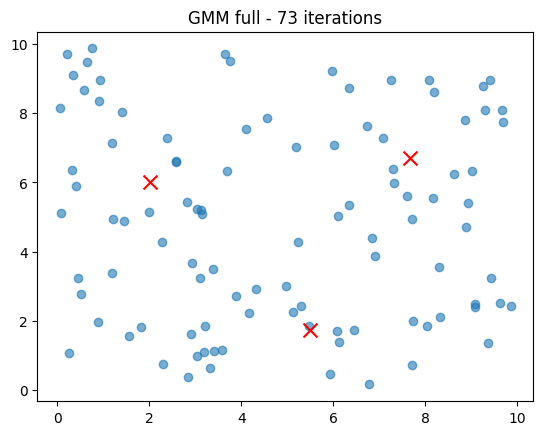


--- Testing tied ---
Converged: 50
Final log-lik: -482.0428495374502
Weights: [0.4123204  0.29460767 0.29307193]
Means:
 [[4.90661705 1.97567399]
 [4.76079792 8.39054891]
 [4.72502951 5.4019316 ]]


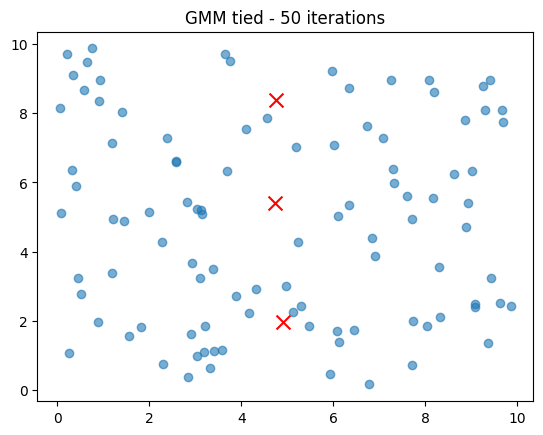


--- Testing diagonal ---
Converged: 75
Final log-lik: -473.263393987414
Weights: [0.3480221  0.34637884 0.30559906]
Means:
 [[5.11684888 1.82307526]
 [1.92674342 6.40789521]
 [7.72999675 6.59575153]]


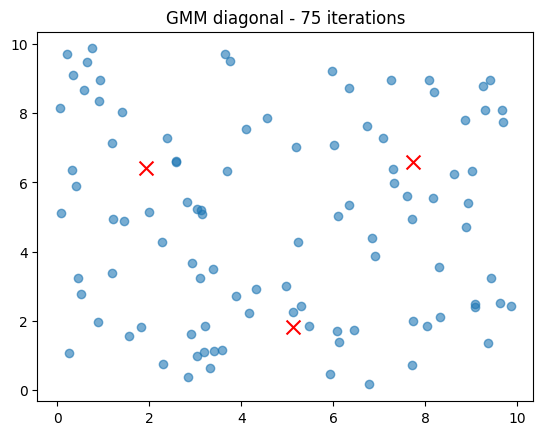


--- Testing spherical ---
Converged: 280
Final log-lik: -484.6928823066382
Weights: [0.25895769 0.17937023 0.56167208]
Means:
 [[2.7173512  2.45099822]
 [1.34048894 7.79000909]
 [6.8835834  5.05220895]]


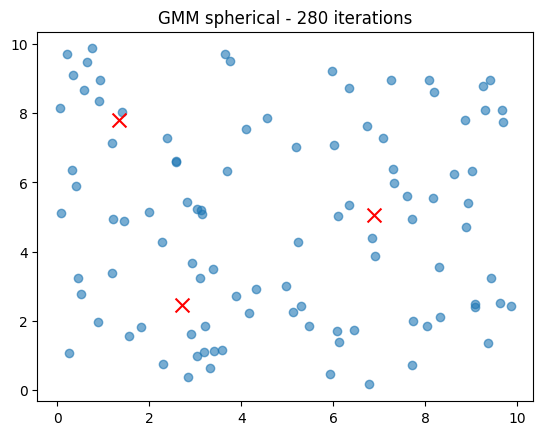

In [17]:
import matplotlib.pyplot as plt

np.random.seed(42)
X = np.random.rand(100, 2) * 10

for cov_type in ['full', 'tied', 'diagonal', 'spherical']:
    print(f"\n--- Testing {cov_type} ---")
    gmm = GMM(n_components=3, 
               covariance_type=cov_type, 
               max_iters=300, 
               tol=1e-6, 
               reg_covar=1e-4,  # Increase regularization for stability
               random_state=42)
    gmm.fit(X)
    
    print("Converged:", len(gmm.log_likelihood))
    print("Final log-lik:", gmm.log_likelihood[-1] if gmm.log_likelihood else "NaN")
    print("Weights:", gmm.weights)
    print("Means:\n", gmm.means)
    
    # Plot results
    plt.figure()
    plt.scatter(X[:, 0], X[:, 1], alpha=0.6)
    if not np.any(np.isnan(gmm.means)):
        plt.scatter(gmm.means[:, 0], gmm.means[:, 1], c='red', s=100, marker='x')
    plt.title(f"GMM {cov_type} - {len(gmm.log_likelihood)} iterations")
    plt.show()
